#### Testeo Modelos 
En este sección vamos a realizar testeos de los diferentes modelos que se guardaron.

Recorda que hicimos entrenamiento por separado. Por un lado tenemos un entrenamiento basado solo en 
latitudes y longitudes, es decir un modelo de predicción de latitudes y longitudes, y por otro lado se tiene un modelo dedicado solo a la prediccion de las alturas. 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.models import load_model
import pickle

%matplotlib widget

In [ ]:
#Carga conjunto de Test.

x_test = pd.read_excel("./Train_Test/Dataset_Separado/x_test_new.xlsx")
y_test = pd.read_excel("./Train_Test/Dataset_Separado/y_test_new.xlsx")


In [ ]:
# Quita de columnas no usadas en Train 
x_test = x_test.drop(columns=['latitude_pos_tx', 'longitude_pos_tx', 'elevation_pos_tx', 'year'])

In [8]:
#Carga de Modelos Entrenados.
autoencoder_x =  load_model('./modelos_entrenamiento/mod_x_R0/modelo1_x_con_scaler/modelo1_x.keras')
with open('./modelos_entrenamiento/mod_x_R0/modelo1_x_con_scaler/scaler_x1.pkl', 'rb') as f:
  scaler_x = pickle.load(f)

autoencoder_y = load_model('./modelos_entrenamiento/mod_y_R0/modelo1_y_con_scaler/modelo1_y.keras')
with open('./modelos_entrenamiento/mod_y_R0/modelo1_y_con_scaler/scaler_y1.pkl', 'rb') as f:
  scaler_y = pickle.load(f)
  
autoencoder_z = load_model('./modelos_entrenamiento/mod_z_R0/modelo1_con_scaler/modelo1.keras')
with open('./modelos_entrenamiento/mod_z_R0/modelo1_con_scaler/scaler_z1.pkl','rb') as f:
  scaler_z = pickle.load(f)



In [53]:
# Valores verdaderos
idx = 0
R0 = 6.371E6

y_true_x = (y_test.iloc[idx].to_numpy())[0:100]/R0
y_true_y = (y_test.iloc[idx].to_numpy())[100:200]/R0
y_true_z = (y_test.iloc[idx].to_numpy())[200:300]/R0

# Predicciones
y_pred_scaled_x = autoencoder_x.predict(np.expand_dims(x_test.iloc[idx], axis = 0))
y_pred_scaled_y = autoencoder_y.predict(np.expand_dims(x_test.iloc[idx], axis = 0))
y_pred_scaled_z = autoencoder_z.predict(np.expand_dims(x_test.iloc[idx], axis = 0))

y_pred_x = scaler_x.inverse_transform(y_pred_scaled_x).flatten()
y_pred_y = scaler_y.inverse_transform(y_pred_scaled_y).flatten()
y_pred_z = scaler_z.inverse_transform(y_pred_scaled_z).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


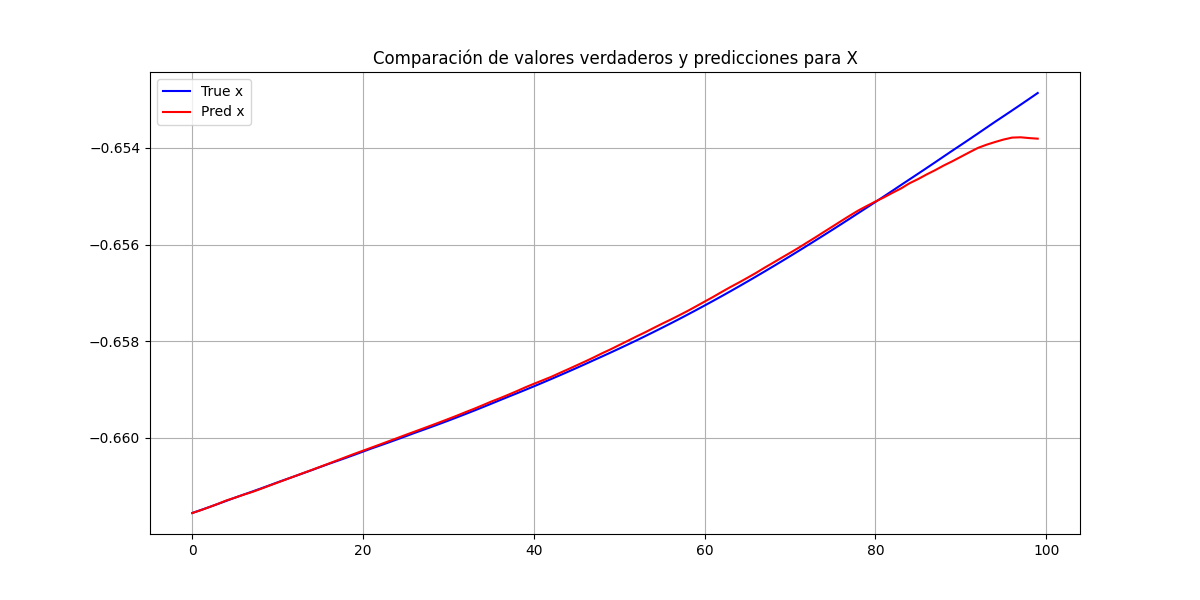

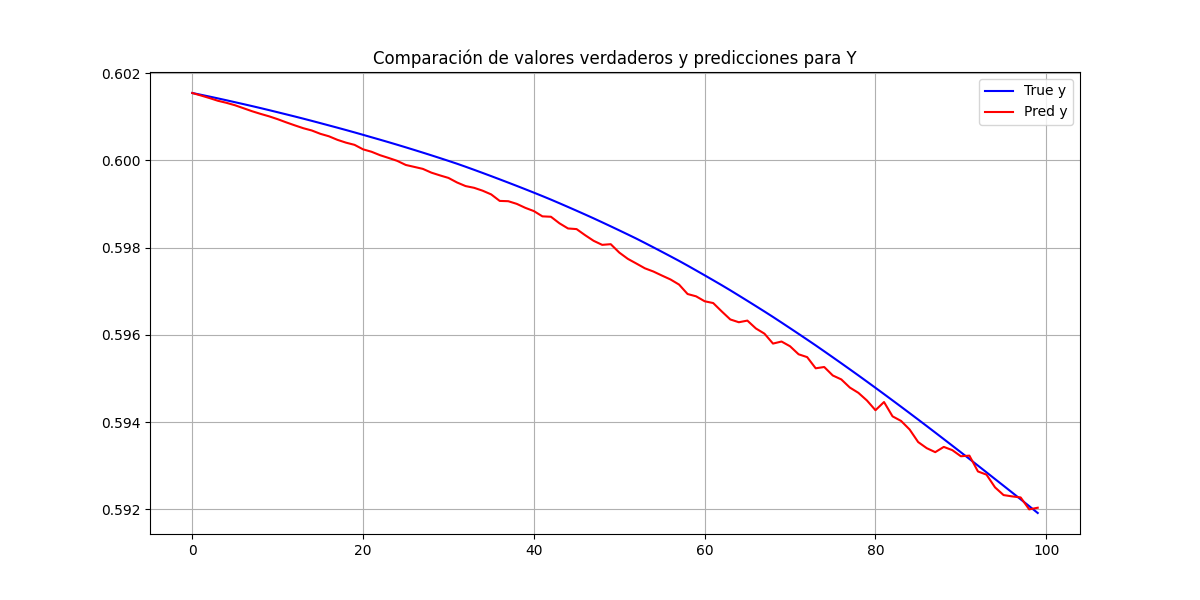

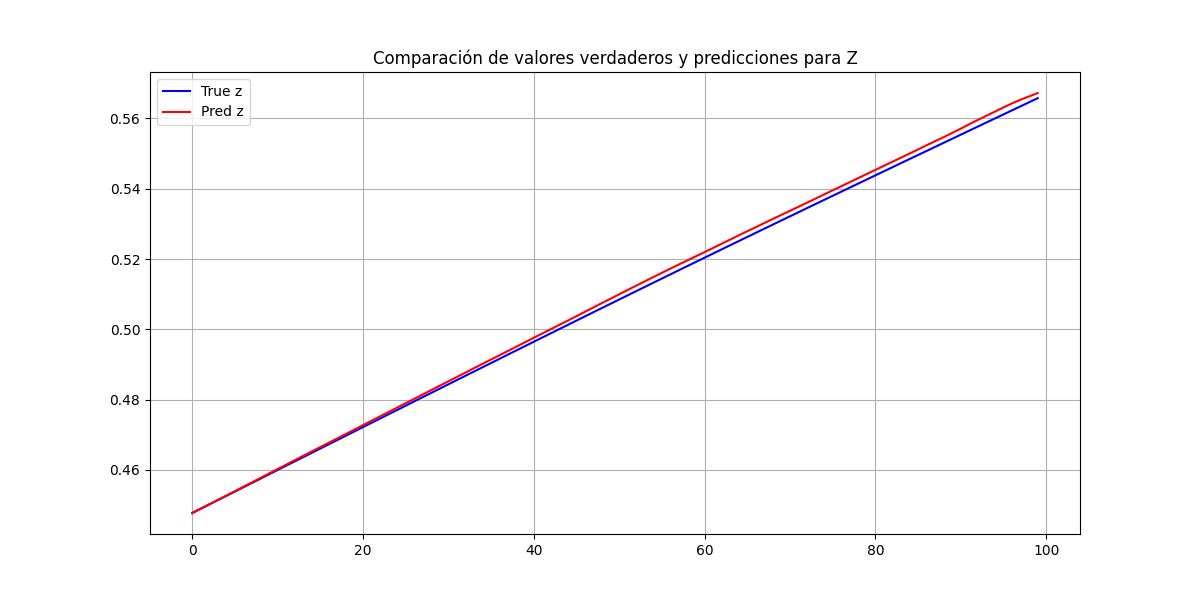

In [54]:
# Graficar resultados
plt.figure(figsize = (12,6))
plt.plot(y_true_x, label = 'True x', color = 'blue')
plt.plot(y_pred_x, label = 'Pred x', color = 'red')
plt.title('Comparación de valores verdaderos y predicciones para X')
plt.grid(True)
plt.legend()
plt.show()
plt.close()

plt.figure(figsize = (12,6))
plt.plot(y_true_y, label = 'True y', color = 'blue')
plt.plot(y_pred_y, label = 'Pred y', color = 'red')
plt.title('Comparación de valores verdaderos y predicciones para Y')
plt.grid(True)
plt.legend()
plt.show()
plt.close()


plt.figure(figsize = (12,6))
plt.plot(y_true_z, label = 'True z', color = 'blue')
plt.plot(y_pred_z, label = 'Pred z', color = 'red')
plt.title('Comparación de valores verdaderos y predicciones para Z')
plt.grid(True)
plt.legend()
plt.show()
plt.close()



In [ ]:
#=====Latitudes Longitudes=====
# y_pred_lat_lon = autoencoder_Lat_Lon.predict(np.expand_dims(x_test.iloc[idx], axis = 0))
y_true = y_test.iloc[idx]
# # Separamos Latitudes Longitudes
y_true_latitudes = y_true[0:100]
y_true_longitudes = y_true[100:200]
# y_pred_latitudes = y_pred_lat_lon[0,0:100]
# y_pred_longitudes = y_pred_lat_lon[0,100:200]
lat_pred, lon_pred = autoencoder_Lat_Lon.predict(np.expand_dims(x_test.iloc[idx], axis = 0))

lat_pred=lat_pred.flatten()
lon_pred = lon_pred.flatten()

#====== Alturas =======
y_pred_heights = autoencoder_Height.predict(np.expand_dims(x_test.iloc[idx], axis = 0))
y_pred_heights = y_pred_heights[0,0:100]
y_true_heights = y_true[200:300]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


## Errores 
1. Error de manera individual:
  * Puedo calcular $d_{2D}$ usando **geopy.distance.geodesic**.
  * Luego calcular la diferencia de alturas $\Delta z$
  * Finalmente usar un $d_{3D} = \sqrt{(d_{2D})^2 + (\Delta z)^2}$ y así obtendría mi distancia en 3D.
2. ECM
  * Para obtener el Error Cuadrático Medio puedo, sumar los valores y dividir por la cantidad de puntos (100 puntos)
3. RECM(RMSE)
  * Por último se podría tomar la raiz del ECM para expresar el error promedio en metros.

In [ ]:
# Distance_havers = utlnn.haversine_distance(y_true_latitudes,y_true_longitudes,y_pred_latitudes,y_pred_longitudes)
Distance_havers = utlnn.haversine_distance(y_true_latitudes,y_true_longitudes,lat_pred)

In [ ]:
plot = False
# Calculamos el error 
error = np.sum(Distance_havers**2)/len(Distance_havers)
print("Raiz del ECM:",np.sqrt(error))

if plot == True:
  plt.figure(figsize=(15,6))
  plt.bar(range(len(Distance_havers)), Distance_havers, color='skyblue')
  plt.xlabel('Índice')
  plt.ylabel('Error (distancia)')
  plt.title('Errores como distancias')
  plt.show()

Raiz del ECM: 26.313489753776924


In [ ]:
# distance = utlnn.distances_by_geodesic(y_true_latitudes,y_true_longitudes,y_pred_latitudes,y_pred_longitudes) #Km
distance = utlnn.distances_by_geodesic(y_true_latitudes,y_true_longitudes,lat_pred,lon_pred) #Km
print(f"distancia 2D: {distance}")
sq_distance = distance**2
error_2d = np.sum(sq_distance)/len(sq_distance) #ECM
sqrt_error_2d = np.sqrt(error_2d)
print("Raiz del error ECM:",error_2d,sqrt_error_2d)


distancia 2D: [ 9.13053263 13.56458857  2.32721904  9.55849918  4.36760061 17.22965822
  9.00572973 10.37967962 20.03977886 15.90496806  2.7107957  12.71059984
 21.98033916  6.8949248   7.61679024 31.21932942 15.91373567 10.65051661
 10.11713052  6.02535828 26.03102519  6.37771097 20.35265067 19.26478935
 22.46113196 18.94264644 16.26455243 16.46454519 26.23715553 18.50940176
 17.82447147 20.87280338 25.29954112 19.99668867 30.38017732 23.67897478
 16.77335902 12.58564987 14.86294893 19.8493346  26.66321582 15.75325772
 22.25607941 22.13626257  8.70810097 24.88636712 21.65896217 13.13706466
 30.71007022 28.96057183 23.38325552 26.11038948 29.63914076 24.88684156
 27.72762722 22.29634367 36.41989635 26.35309117 41.70347478 24.88289675
 24.03675737 32.64530603 29.78526463 41.28803813 19.74382258 21.3933318
 38.77874112 29.09534864 25.40856497 19.92681384 25.13730932 29.77278334
 28.2443792  37.96529688 29.34250965 35.20165323 30.93998672 27.83377382
 39.53447138 41.12044778 27.24096487 3

In [ ]:
plot1 = False
if plot1 == True:
  plt.figure(figsize=(15,6))
  plt.bar(range(len(distance)), distance, color='skyblue')
  plt.xlabel('Índice')
  plt.ylabel('Error (distancia)')
  plt.title('Errores como distancias 2D Km')
  plt.show()

In [ ]:
distance_3d = utlnn.distances_3D(distance,y_true_heights,y_pred_heights)   
plot = False 
if plot == True:
  plt.figure(figsize=(15,6))
  plt.bar(range(len(distance_3d)), distance_3d, color='skyblue')
  plt.xlabel('Índice')
  plt.title('Errores como distancias 2D Km')
  plt.show()
print(distance_3d)

[ 9.13226382 13.57004331  2.90954281  9.63029991  5.1507746  17.37115861
  9.30619855 10.7231142  20.07430649 16.61326522  4.23181367 12.88993845
 22.03421596  7.11517147  8.37468267 31.41049631 16.17731625 11.21537432
 10.65777648  6.86634163 26.32000479  7.01442892 20.45538859 19.53093061
 22.71071635 19.28074043 16.51792941 16.65349557 26.71264315 18.72540765
 18.19718123 21.24015736 25.50388349 20.3051896  30.55749753 23.86158359
 17.50158563 12.73177844 14.89439639 19.97467234 26.9107241  15.78093367
 22.28786227 22.36002972  9.17613717 24.91080398 21.75806775 13.25779271
 30.78630774 29.09776418 23.44253644 26.12223404 29.78810307 24.91348116
 27.81101998 22.48410807 36.49728351 26.41251726 41.70444465 24.988909
 24.07384014 32.65568359 29.80406877 41.33813653 19.7781071  21.41436363
 38.78003312 29.23872409 25.4416597  19.95721024 25.14397651 29.78890565
 28.24461471 37.97891309 29.36311    35.26545391 31.07011008 27.83512853
 39.53949389 41.15601545 27.35445168 32.15377135 27.1